In [7]:
import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd
import time
from tqdm import tqdm
import numpy as np
from sklearn.metrics import f1_score
from tqdm import tqdm
import numpy as np

# Info about the data

**what is predictive maintenance?**

As system complexity and efficiency requirements continue to increase, the strategy of machine maintenance has changed. Where in the past, breakdown corrective maintenance or scheduled preventive maintenance was the standard, now, more intelligent approaches, like predictive maintenance (PM), are strived for. Unlike previous maintenance strategies, predictive maintenance uses the machine’s historical time series sensor data to evaluate the condition. The goal is to proactively maintain the machines before failures occur and therefore minimize downtimes.

**Task**

You will use the measured data from a device to predict whether the device will fail in the next week (as shown in Figure 1). The data was collected by a Supervisory Control And Data Acquisition (SCADA) system. Such systems are widely used in industrial production processes to collect a variety of information, e.g. Environmental information (temperature, humidity), device status information (current, voltage, vibration) and controller parameter information.

![title](images/data.PNG)

**Data set**

A total of 75 sensors are installed on the equipment. The sampling frequency is 10 minutes. It will be saved in a csv file every about 4500 minutes.

Alle gesammelten Informationen sind in der folgenden Tabelle aufgeführt.

| Sensor Nr | Information | Sensor Nr | Information   | Sensor Nr | Information      |
|----------|:-----------------:|------------------:|------------------:|-----------------|------------------------------------|
| 1  |  Wheel speed   |               26 | Inverter inlet temperature |      51       |  Pitch motor 1 power estimation          |
| 2  |  hub angle     |               27 | inverter outlet temperature             |       52       |  Pitch motor 2 power estimation         |
| 3  |  blade 1 angle  |               28 | inverter inlet pressure |       53       |  Pitch motor 3 power estimation          |
| 4  |  blade 2 angle        |               29 | inverter outlet pressure             |    54          |   Fan current status value         |
| 5  |  blade 3 angle        |               30 | generator power limit value |     55        |     hub current status value       |
| 6  |  pitch motor 1 current        |               31 | reactive power set value             |     56         |   yaw state value         |
| 7  |  pitch motor 2 current        |               32 | Rated hub speed |      57        |    yaw request value        |
| 8  |  Pitch motor 3 current        |               33 | wind tower ambient temperature       |        58      |   blade 1 battery box temperature         |
| 9  |  overspeed sensor speed detection value |               34 | generator stator temperature 1 |        59      |  blade 2 battery box temperature          |
| 10 |  5 second yaw against wind average      |               35 | generator stator temperature 2             |      60        |   blade 3 battery box temperature         |
| 11 |  x direction vibration value   |               36 | generator stator temperature 3 |      61       |   vane 1 pitch motor temperature         |
| 12 |  y direction vibration value   |               37 | generator stator temperature 4             |      62        |  blade 2 pitch motor temperature          |
| 13 |  hydraulic brake pressure      |               38 | generator stator temperature 5 |      63        |     blade 3 pitch motor temperature       |
| 14 |  Aircraft weather station wind speed      |               39 | generator stator temperature 6             |      64        |    blade 1 inverter box temperature        |
| 15 |  wind direction absolute value        |               40 | generator air temperature 1 |      65        |    blade 2 inverter box temperature        |
| 16 |  atmospheric pressure        |               41 | generator air temperature 2             |      66        |    blade 3 inverter box temperature        |
| 17 |  reactive power control status        |               42 | main bearing temperature 1 |       67       |   blade 1 super capacitor voltage         |
| 18 |  inverter grid side current        |               43 | main bearing temperature 2             |      68        |    blade 2 super capacitor voltage        |
| 19 |  inverter grid side voltage        |               44 | Wheel temperature |      69        |    blade 3 super capacitor voltage        |
| 20 |  Inverter grid side active power        |               45 | Wheel control cabinet temperature             |      70       |   drive 1 thyristor temperature         |
| 21 |  inverter grid side reactive power        |               46 | Cabin temperature |      71       |   Drive 2 thyristor temperature         |
| 22 |  inverter generator side power        |               47 | Cabin control cabinet temperature             |      72        |            | Drive 3 thyristor temperature
| 23 |  generator operating frequency        |               48 | Inverter INU temperature|      73        |  Drive 1 output torque          |
| 24 |  generator current'        |               49 | Inverter ISU temperature             |      74        |    Drive 2 output torque        |
| 25 |  generator torque        |               50 | Inverter INU RMIO temperature             |      75        |     Drive 3 output torque       |


| ID                                         | Label | 
|----------|:-----------------|
| 01725e06-98ea-3447-83c0-b3aa70feff62.csv   |       0        |   
| 02c2cada-dbbe-304b-95b2-076ddba766c9.csv   |        1       |     

**0**: Das entsprechende Gerät ist innerhalb der nächsten Woche nicht ausgefallen

**1**: Das entsprechende Gerät ist innerhalb der nächsten Woche ausgefallen

# Data Exploration

In [8]:
data = pd.read_csv("data/train/002/001448e2-09aa-3560-9650-3c791a39ff01.csv")
data.head()

,Wheel speed,hub angle,blade 1 angle,blade 2 angle,blade 3 angle,pitch motor 1 current,pitch motor 2 current,Pitch motor 3 current,overspeed sensor speed detection value,5 second yaw against wind average,...,blade 3 inverter box temperature,blade 1 super capacitor voltage,blade 2 super capacitor voltage,blade 3 super capacitor voltage,drive 1 thyristor temperature,Drive 2 thyristor temperature,Drive 3 thyristor temperature,Drive 1 output torque,Drive 2 output torque,Drive 3 output torque
0,11.09,150.98,0.26,0.26,0.22,9.20,8.40,8.80,11.31,10.6,...,300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10.94,256.00,0.26,0.26,0.22,8.56,9.12,11.10,11.16,0.0,...,300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11.01,177.01,0.26,0.26,0.22,8.00,8.42,9.20,11.26,11.5,...,300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9.54,63.00,0.26,0.26,0.22,6.48,8.72,6.54,9.76,-21.0,...,300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11.02,36.00,0.26,0.26,0.22,8.10,9.96,9.52,11.28,0.7,...,300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
data.shape

(439, 75)

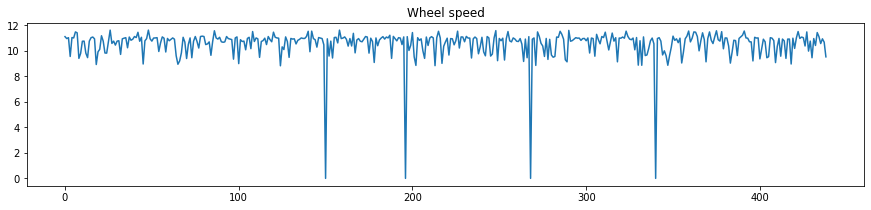

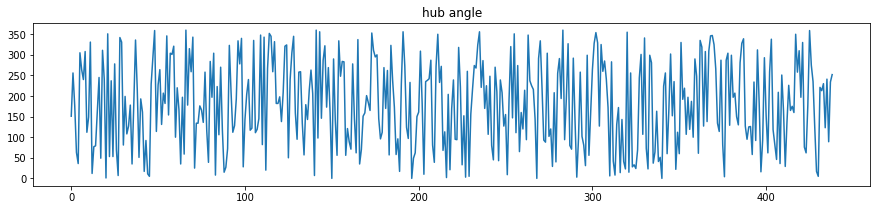

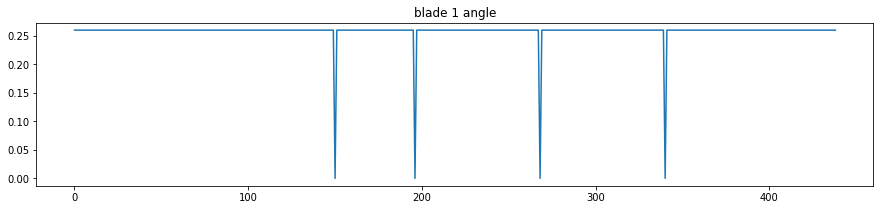

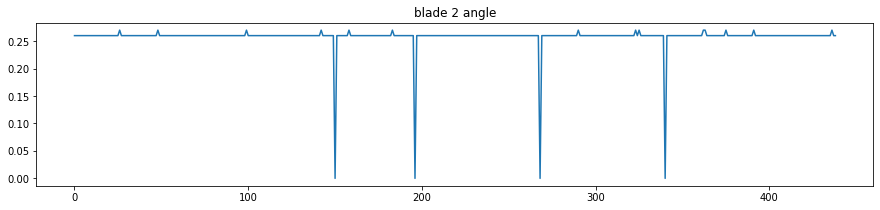

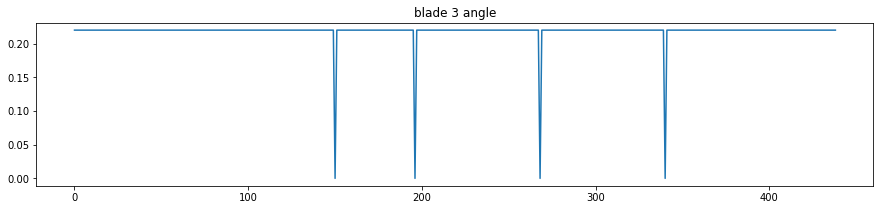

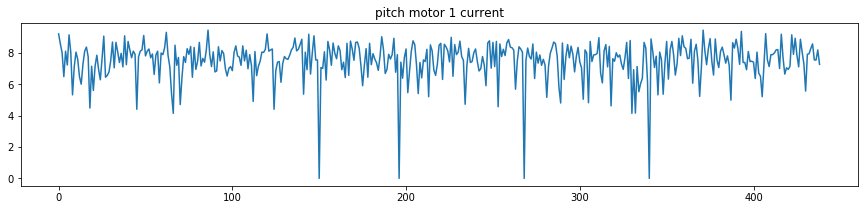

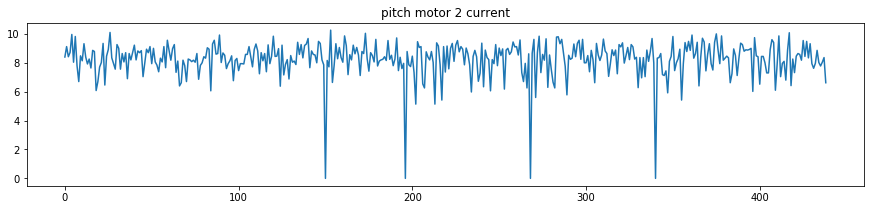

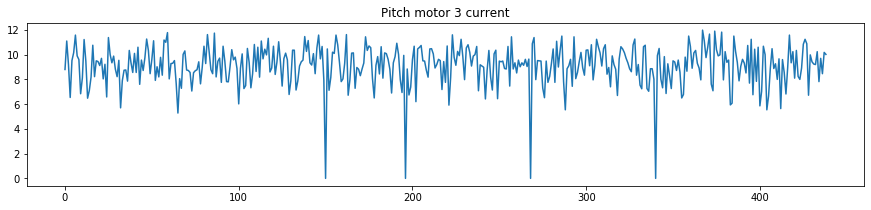

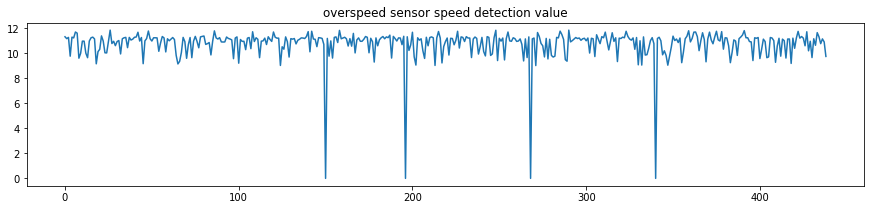

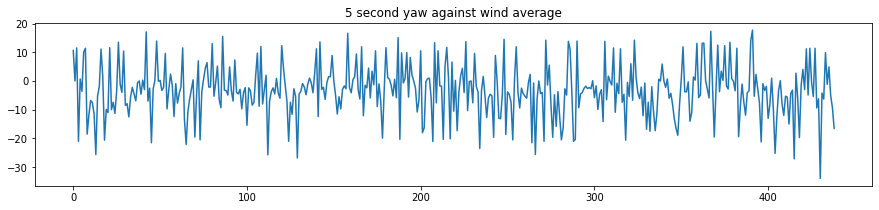

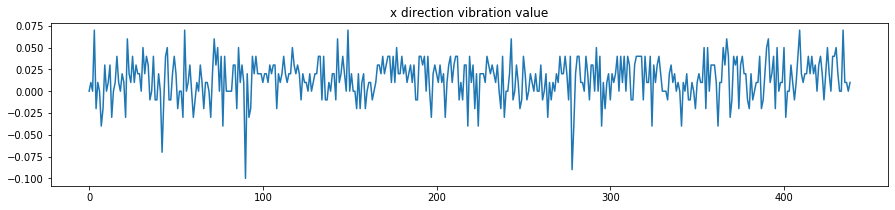

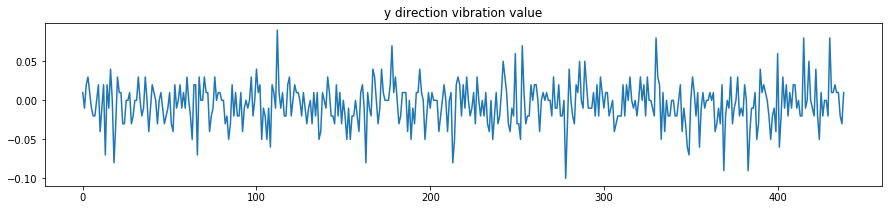

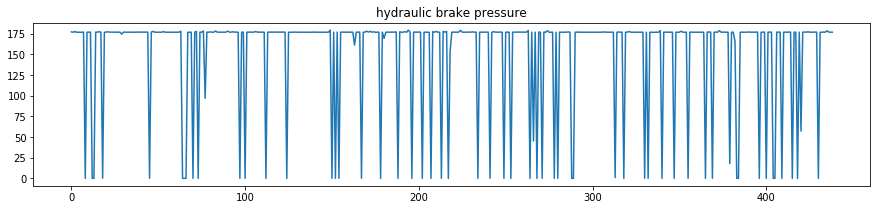

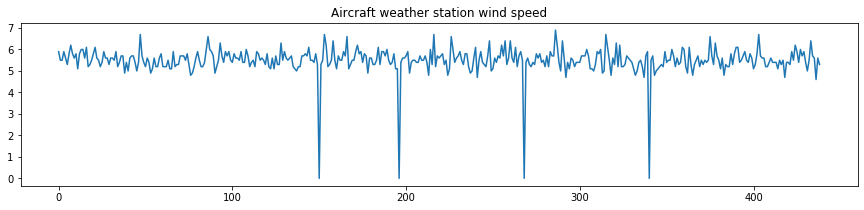

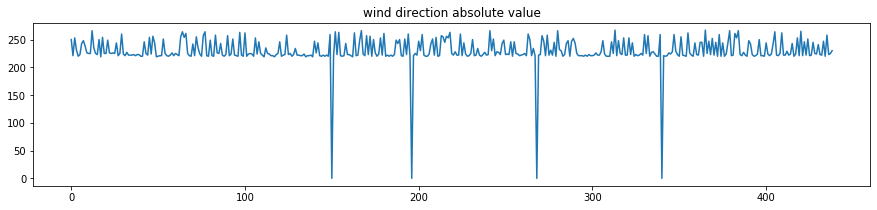

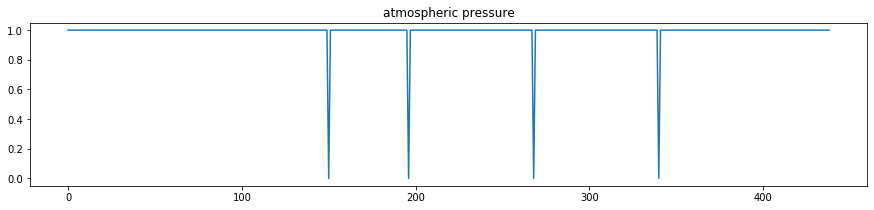

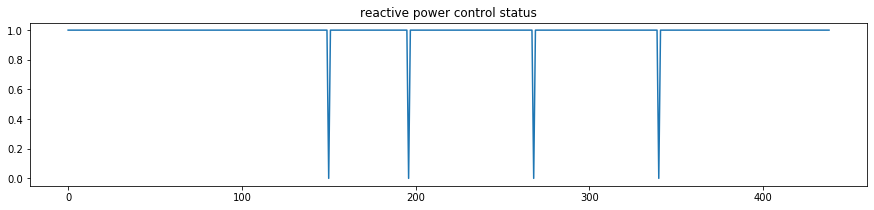

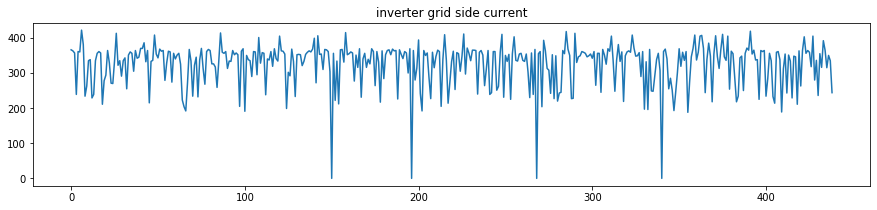

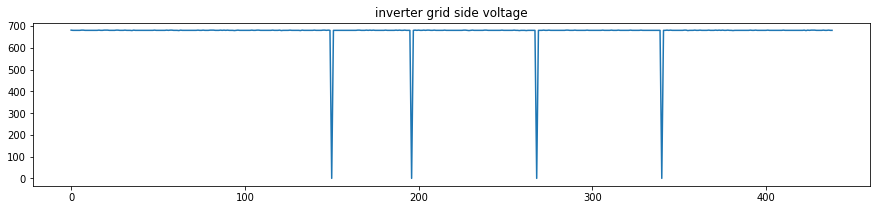

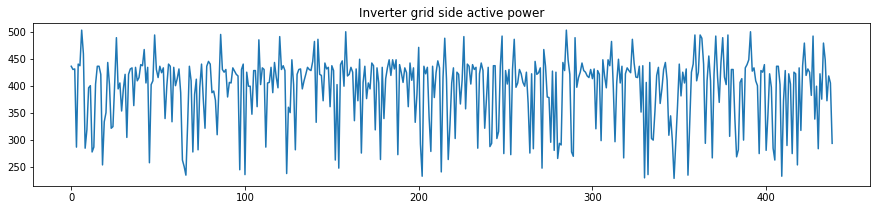

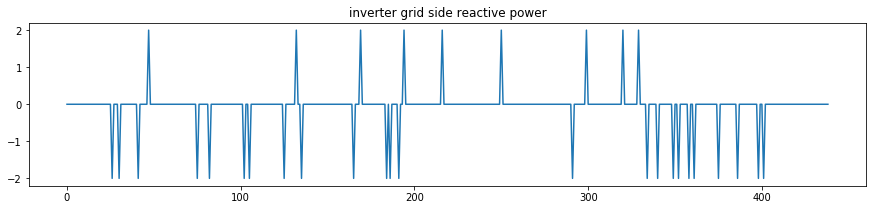

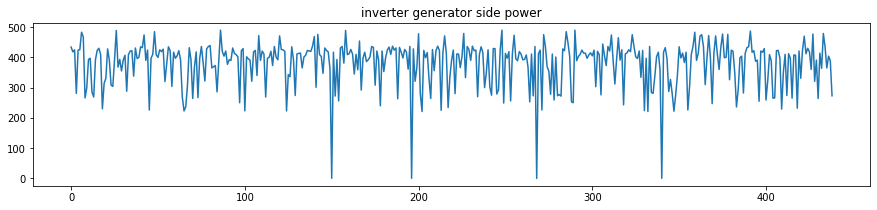

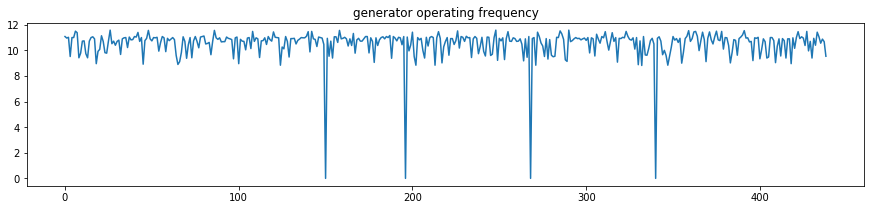

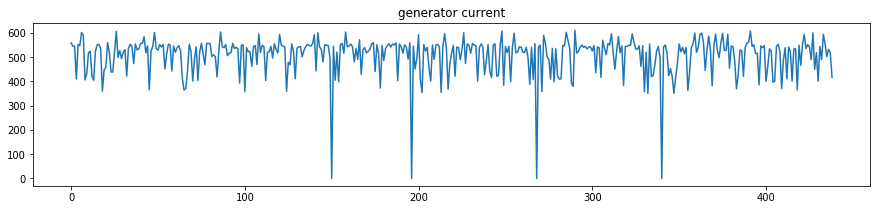

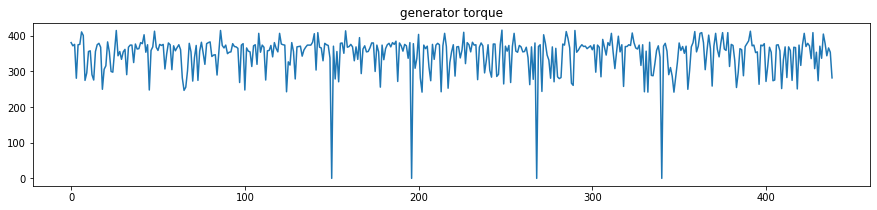

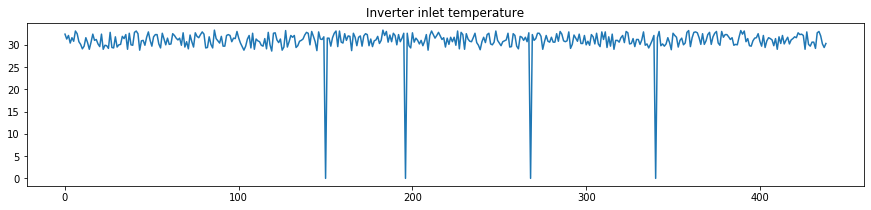

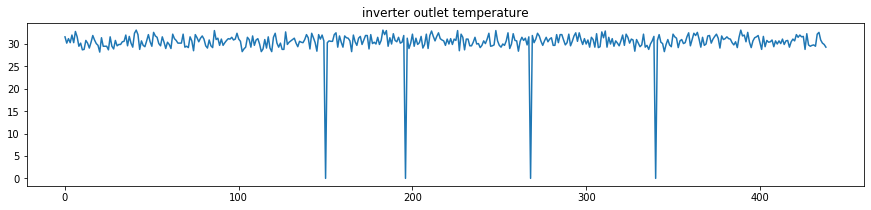

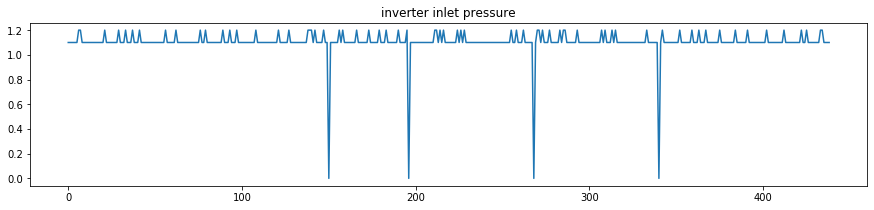

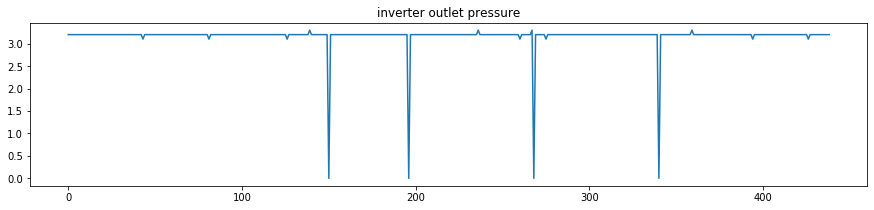

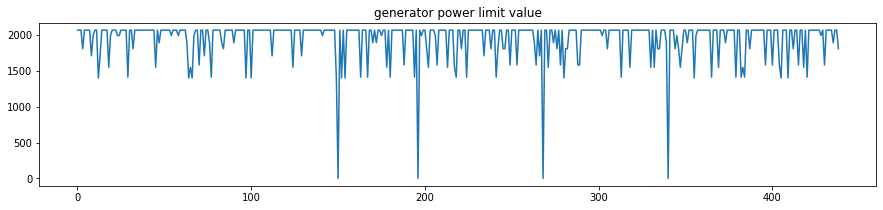

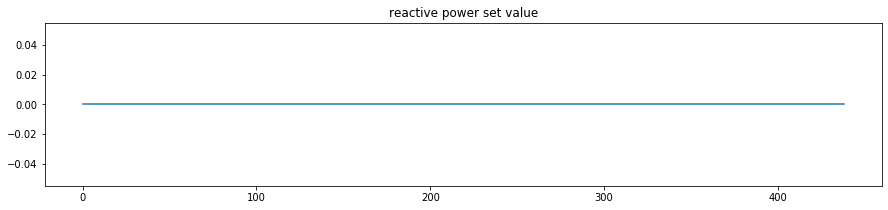

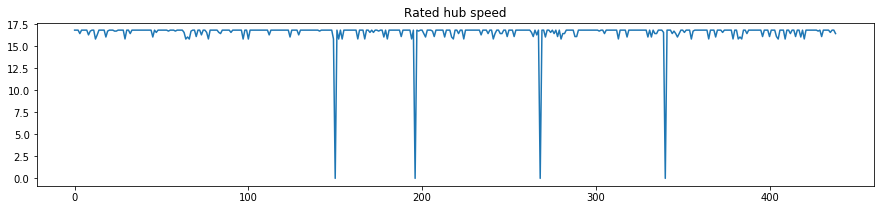

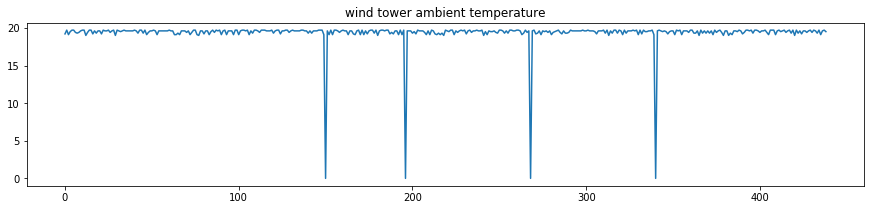

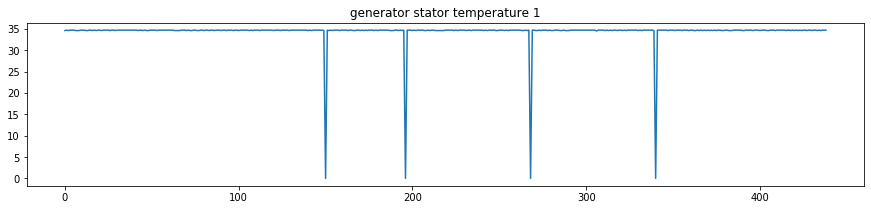

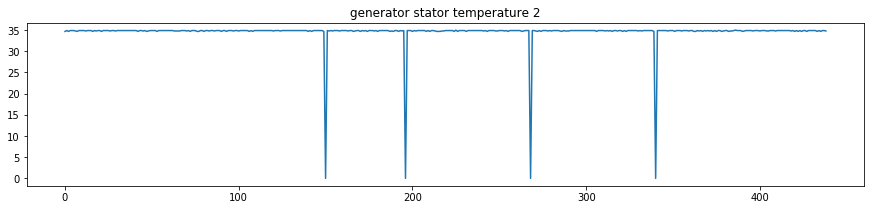

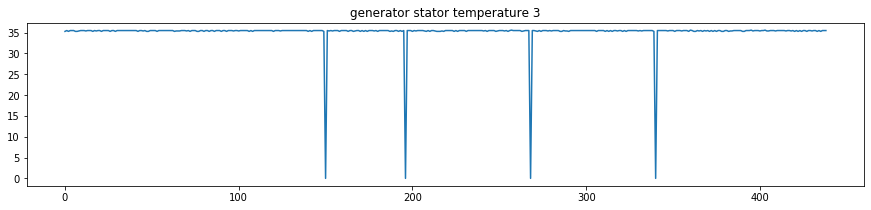

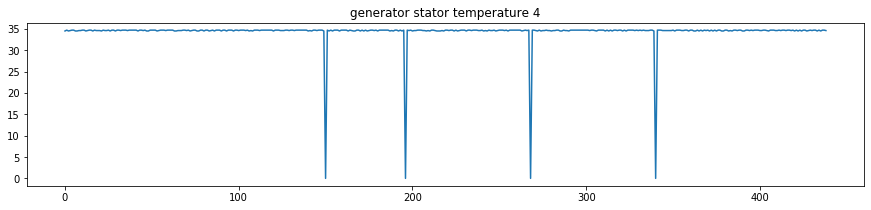

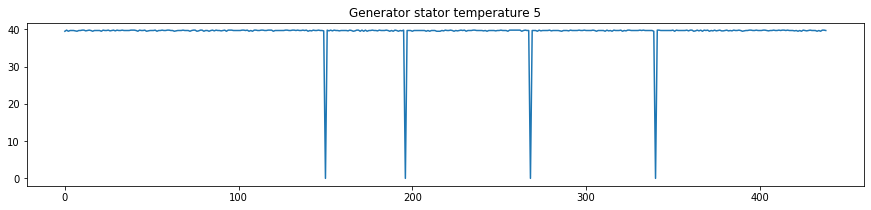

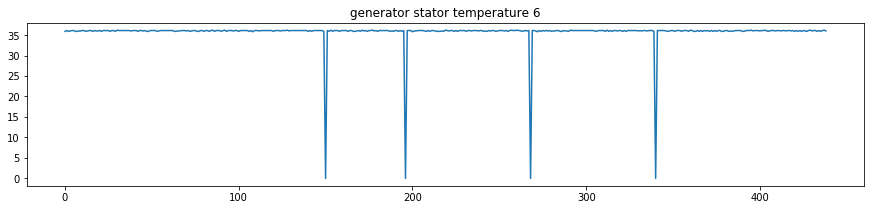

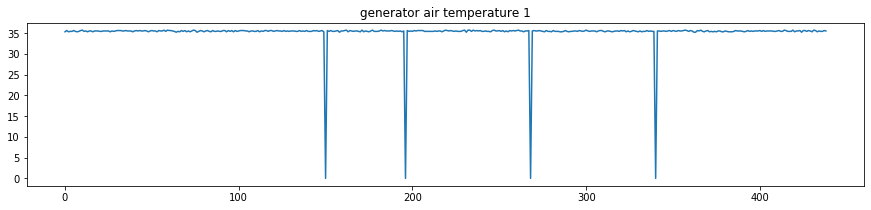

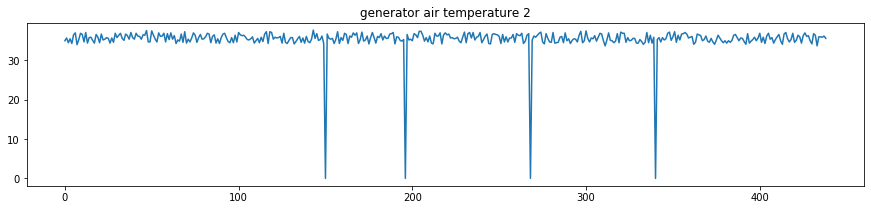

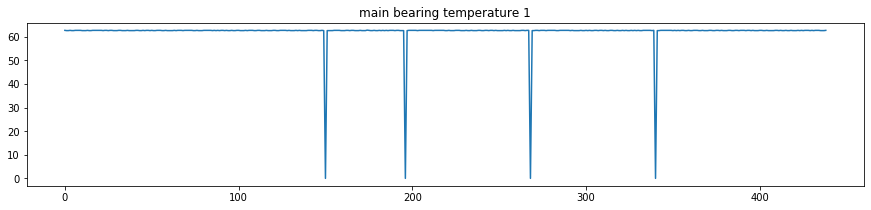

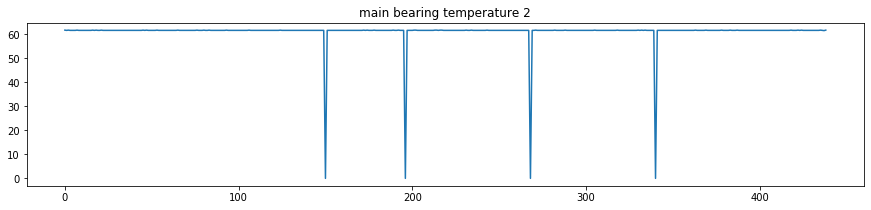

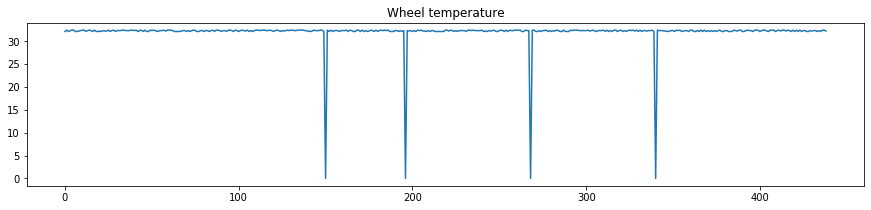

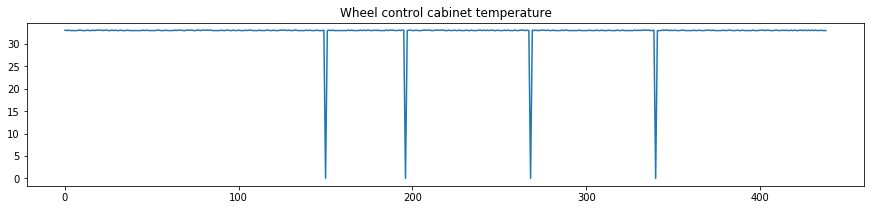

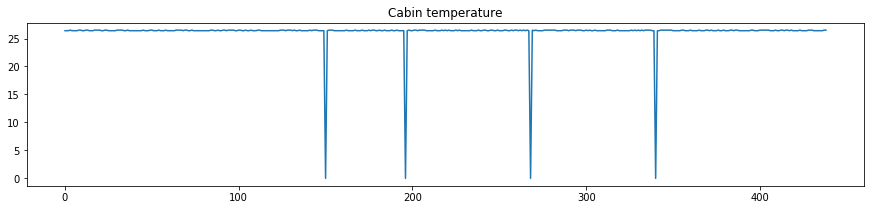

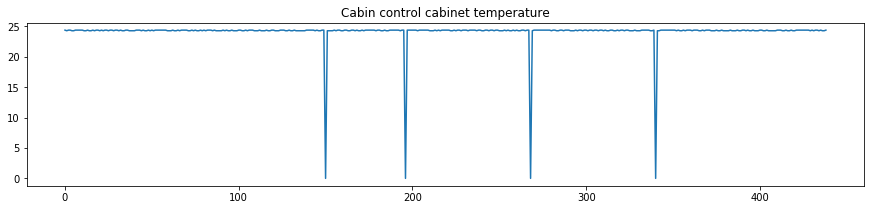

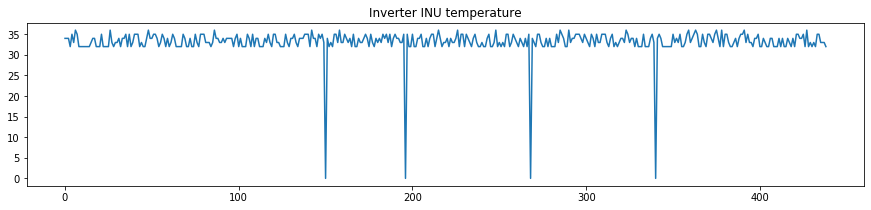

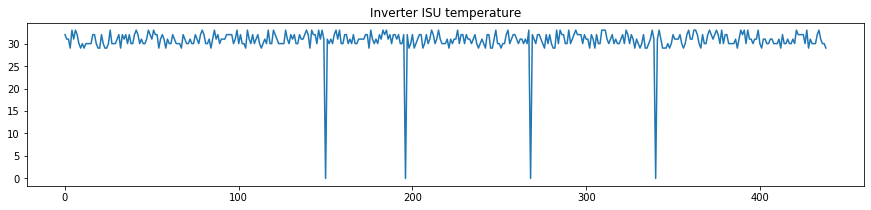

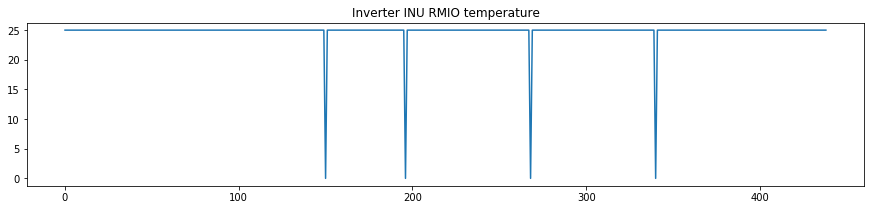

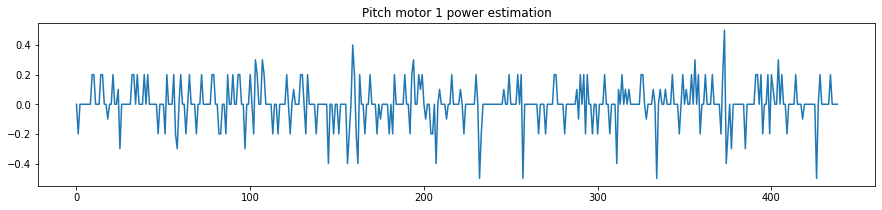

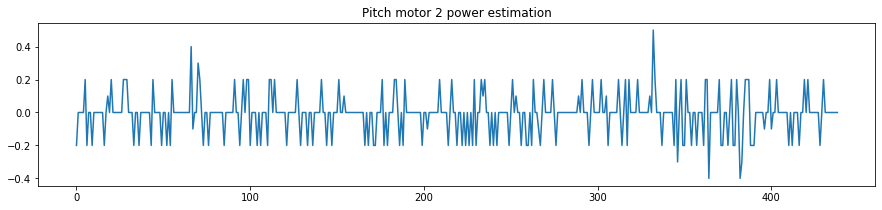

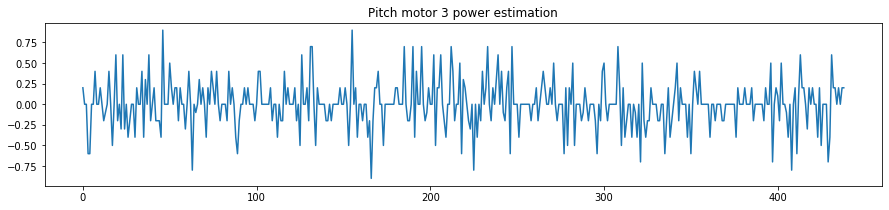

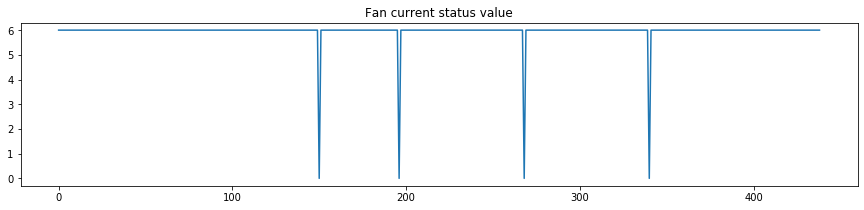

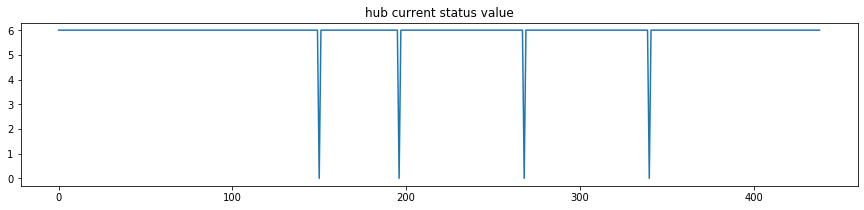

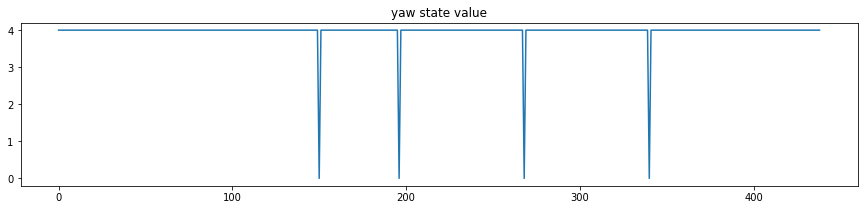

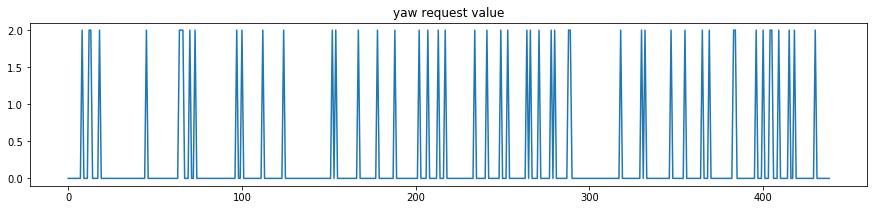

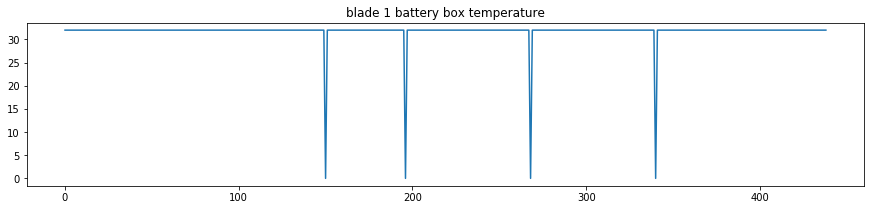

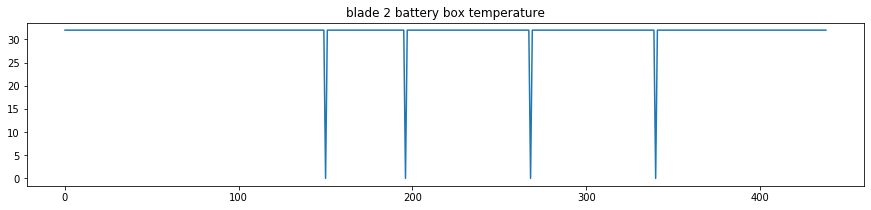

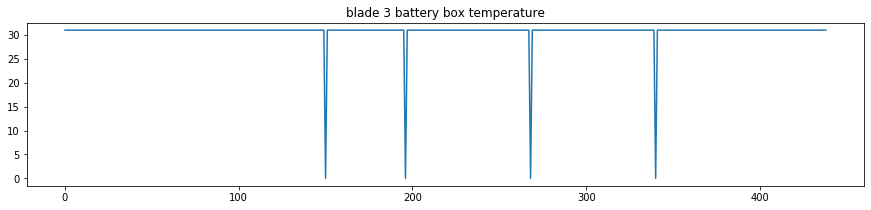

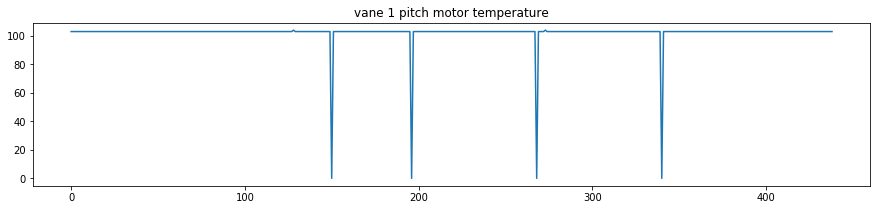

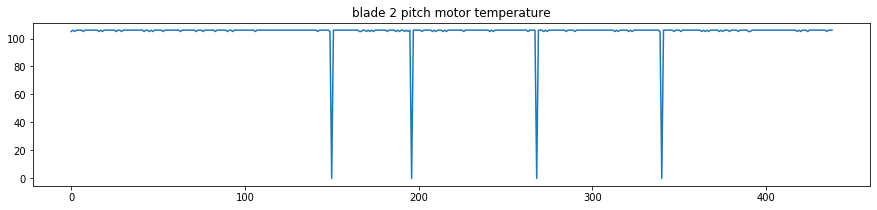

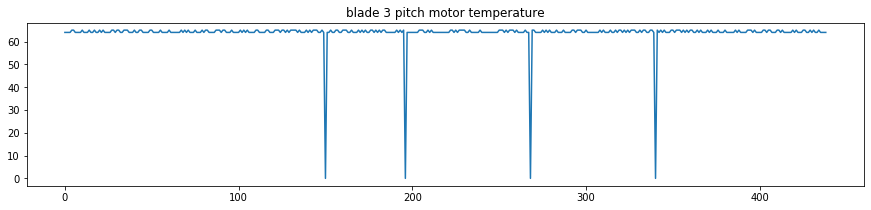

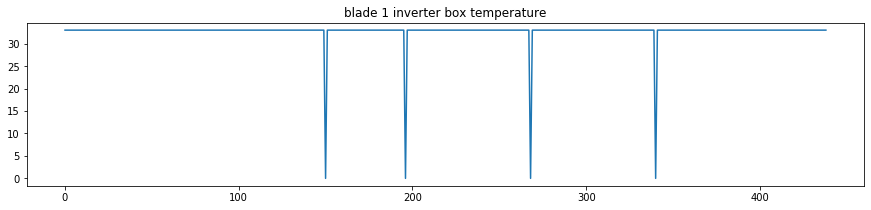

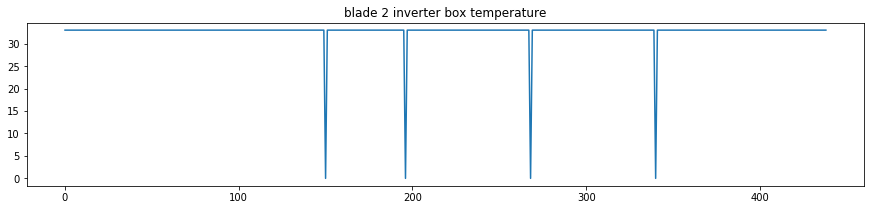

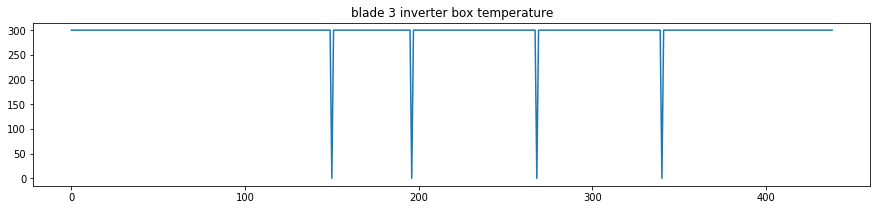

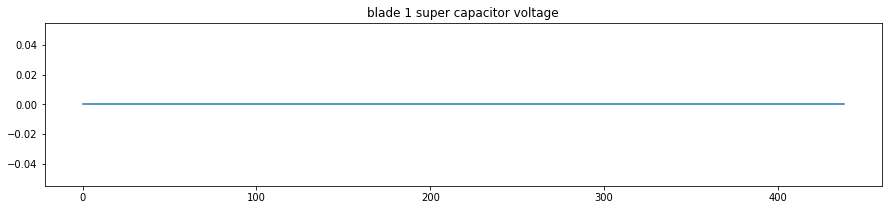

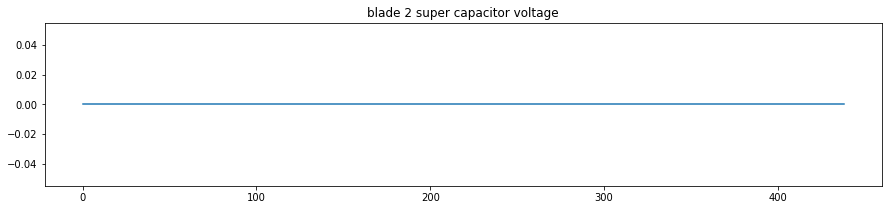

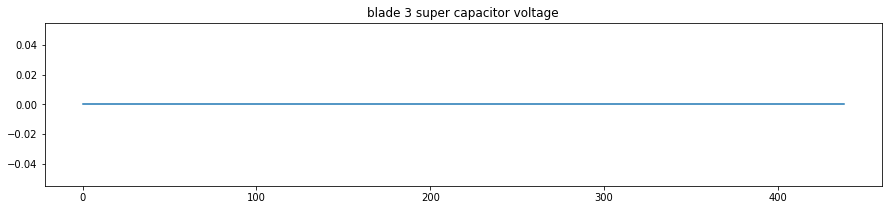

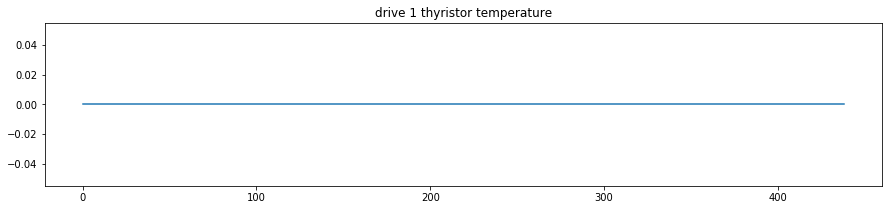

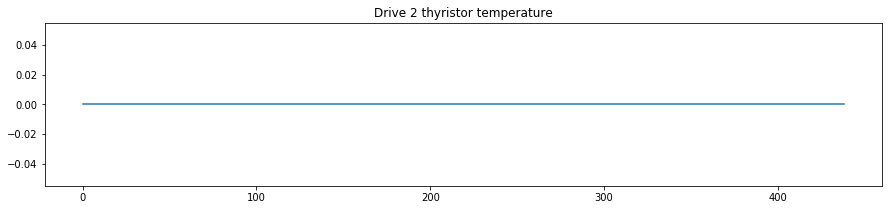

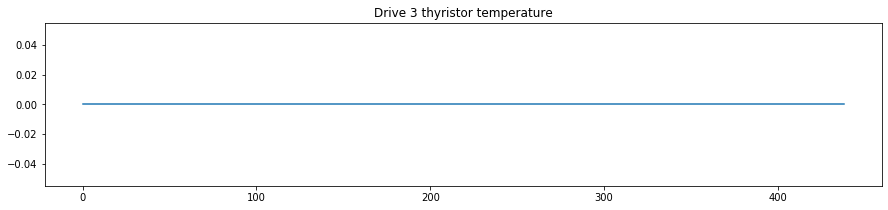

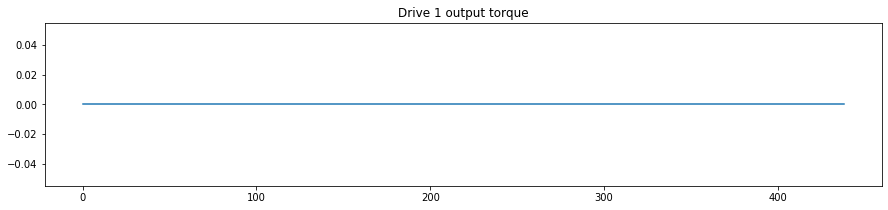

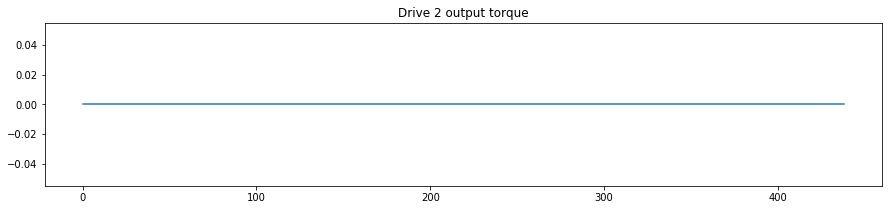

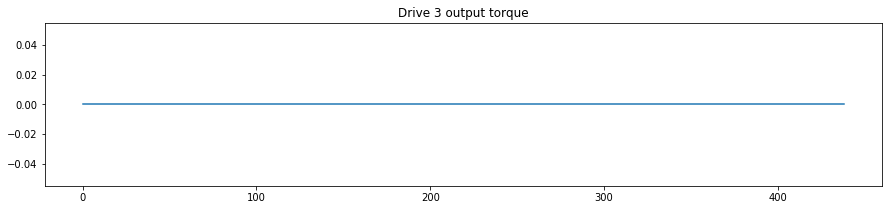

In [10]:
import matplotlib.pyplot as plt
for col in data.columns:
    plt.figure(figsize=(15,3))
    plt.plot(data[col])
    plt.title(col)

# Feature Engneering

In [11]:
import tsfresh
from tsfresh import defaults, extract_features
from tsfresh.feature_selection.relevance import calculate_relevance_table
from tsfresh.feature_extraction import ComprehensiveFCParameters

In [12]:
time_start = time.time()
data["id"] =  pd.DataFrame(np.ones(data.shape[0]).reshape(-1))
data["time"] =  pd.DataFrame(np.arange(data.shape[0]+1).reshape(-1))
feature = extract_features(data, n_jobs=4,disable_progressbar=True,
                                column_id='id', column_sort='time',
                                default_fc_parameters=ComprehensiveFCParameters())
time_finish = time.time()
print('The total time taken to extract features from one time serie: \t %d mins %d secs'%(int((time_finish - time_start)/60), int((time_finish - time_start)%60)))


The total time taken to extract features from one time serie: 	 4 mins 34 secs


In [17]:
feature

variable,5 second yaw against wind average__abs_energy,5 second yaw against wind average__absolute_sum_of_changes,"5 second yaw against wind average__agg_autocorrelation__f_agg_""mean""__maxlag_40","5 second yaw against wind average__agg_autocorrelation__f_agg_""median""__maxlag_40","5 second yaw against wind average__agg_autocorrelation__f_agg_""var""__maxlag_40","5 second yaw against wind average__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","5 second yaw against wind average__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","5 second yaw against wind average__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","5 second yaw against wind average__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","5 second yaw against wind average__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,yaw state value__symmetry_looking__r_0.9,yaw state value__symmetry_looking__r_0.9500000000000001,yaw state value__time_reversal_asymmetry_statistic__lag_1,yaw state value__time_reversal_asymmetry_statistic__lag_2,yaw state value__time_reversal_asymmetry_statistic__lag_3,yaw state value__value_count__value_-1,yaw state value__value_count__value_0,yaw state value__value_count__value_1,yaw state value__variance,yaw state value__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
1.0,40646.51,4388.3,-0.001905,0.004721,0.001836,10.819394,-0.006164,-0.002276,0.056977,16.137778,...,1.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.144458,0.0


# Experrment: acceleration Through Parallel computing
- Target: Testing the acceleration effects of different parallel methods
- Task design: Extract 4 features from the sampled time series: max, min, mean, var
- Candidate Methods:
    - single core 
    - Joblibs with 8 cores
    - Dask with 25 workers 50 cores
    - Dask + intake with 25 worker 50 cores



In [13]:
TRAIN_LABEL_PATH = "data/train_labels.csv"
TRAIN_PATH = "data/train/"

# label dataframe 
label = pd.read_csv(TRAIN_LABEL_PATH)



feture_to_extract = {"mean":np.mean,
                    "max":np.max,
                    "min":np.min,
                    "var":np.var}

def get_feature(args):
    _file_path = args
    _df = pd.read_csv(_file_path)
    _file_name = _file_path.split('/')[-1]
    _feature_values = []
    # Extracting the mean from the time series as a feature
    for key in feture_to_extract.keys():
        _feature_values.extend(list(feture_to_extract[key](_df).values)) 
    return _feature_values

# Original

In [3]:
# extract features from train (time series)
time_start = time.time()
dict_result = {}
for folds in tqdm(os.listdir(TRAIN_PATH)):
    dict_temp = {}
    nargs = os.listdir(TRAIN_PATH + folds)
    nargs = [(TRAIN_PATH + folds + '/' + _i) for _i in nargs]
    for item in nargs:
        dict_temp[item.split("/")[-1]] = get_feature(item)
    dict_result.update(dict_temp)
time_finish = time.time()
print('The total time taken without Parallel is: \t %d mins %d secs'%(int((time_finish - time_start)/60), int((time_finish - time_start)%60)))



100%|██████████| 25/25 [21:20<00:00, 39.89s/it] 

The total time taken without Parallel is: 	 21 mins 20 secs


# Joblib

In [14]:
from joblib import Parallel, delayed
from datetime import datetime
from tqdm import tqdm
import time

In [15]:
def extract_features_from_files_in_folds(folds):
    dict_result = {}
    dict_temp = {}
    nargs = os.listdir(TRAIN_PATH + folds)
    nargs = [(TRAIN_PATH + folds + '/' + _i) for _i in nargs]
    for item in nargs:
        dict_temp[item.split("/")[-1]] = get_feature(item)
    dict_result.update(dict_temp)
    return dict_result

In [16]:
time_start = time.time()
results = Parallel(n_jobs=8)(delayed(extract_features_from_files_in_folds)(i) for i in tqdm(os.listdir(TRAIN_PATH)))
time_finish = time.time()
print('The total time taken for Parallel with JOBLIB is: \t %d mins %d secs'%(int((time_finish - time_start)/60), int((time_finish - time_start)%60)))


100%|██████████| 25/25 [01:26<00:00,  3.44s/it]


The total time taken for Parallel Method 1 with JOBLIB is: 	 4 mins 39 secs


# Dask

In [20]:
from dask.distributed import Client, progress
import dask
import random

In [21]:
client = Client(n_workers = 25, memory_limit = '3GB')

In [22]:
client

Client Scheduler: tcp://127.0.0.1:34997 Dashboard: http://127.0.0.1:40053/status,Cluster Workers: 25 Cores: 50 Memory: 75.00 GB


In [23]:
time_start = time.time()
tmp = client.map(extract_features_from_files_in_folds, os.listdir(TRAIN_PATH))
def combine(results):
    dic = {}
    for i in results:
        dic.update(i)
output = client.submit(combine, tmp)
result = output.result()
time_finish = time.time()
print('The total time taken for Parallel with DASK is: \t %d mins %d secs'%(int((time_finish - time_start)/60), int((time_finish - time_start)%60)))


The total time taken for Parallel with DASK is: 	 3 mins 26 secs


# Intake + Dask

In [24]:
import intake

In [25]:
ds = intake.open_csv('data/whole_data.csv')

In [26]:
ddf = ds.to_dask()

In [37]:
time_start = time.time()
ddf = ddf.persist()
on = 'file_name'
tmp1 = ddf.groupby(on).max().compute()
tmp2 = ddf.groupby(on).min().compute()
tmp3 = ddf.groupby(on).mean().compute()
tmp4 = ddf.groupby(on).var().compute()
time_finish = time.time()
print('The total time taken for Parallel with DASK and intake is: \t %d mins %d secs'%(int((time_finish - time_start)/60), int((time_finish - time_start)%60)))


The total time taken for Parallel with DASK and intake is: 	 1 mins 10 secs


# Model training

In [38]:
# rename the column and combine all the generated features
tmp1.columns = ['max_'+i for i in tmp1.columns]
tmp2.columns = ['min_'+i for i in tmp2.columns]
tmp3.columns = ['mean_'+i for i in tmp3.columns]
tmp4.columns = ['var_'+i for i in tmp4.columns]

train = pd.concat([tmp1, tmp2, tmp3, tmp4], axis = 1)
train = train.reset_index()

In [42]:
train.head()

,file_name,max_Wheel speed,max_hub angle,max_blade 1 angle,max_blade 2 angle,max_blade 3 angle,max_pitch motor 1 current,max_pitch motor 2 current,max_Pitch motor 3 current,max_overspeed sensor speed detection value,...,var_blade 3 inverter box temperature,var_blade 1 super capacitor voltage,var_blade 2 super capacitor voltage,var_blade 3 super capacitor voltage,var_drive 1 thyristor temperature,var_Drive 2 thyristor temperature,var_Drive 3 thyristor temperature,var_Drive 1 output torque,var_Drive 2 output torque,var_Drive 3 output torque
0,001448e2-09aa-3560-9650-3c791a39ff01.csv,11.60,360.00,0.26,0.27,0.22,9.44,10.26,11.98,11.84,...,814.428808,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,006c4689-08f2-3752-9096-8c616badfda9.csv,0.00,162.00,86.00,86.00,86.00,16.60,7.80,8.10,0.15,...,200.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0080040c-3ccf-333e-ad9a-dd516c30200c.csv,17.31,358.99,2.47,2.54,2.44,27.44,27.52,26.78,17.57,...,629.349870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00a22713-68d5-372a-a009-b948ce453442.csv,7.07,358.99,86.00,86.00,86.00,18.74,25.06,21.46,7.26,...,401.781684,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00b61408-1ab3-303d-b0a4-9b53aa93810e.csv,2.63,357.98,21.00,21.00,21.00,3.68,3.10,4.60,2.76,...,605.362699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
_df = pd.read_csv(item)
columns =  _df.columns
feature_columns = []
for key in feture_to_extract.keys():
    for column in columns:
        feature_columns.append(key+"_"+column)
        
feature_columns.append("ret")
train = pd.DataFrame(dict_result)
# train.head()
train = train.T
train['file_name'] = train.index
train = train.reset_index(drop=True)

In [45]:
train = pd.concat([tmp1, tmp2, tmp3, tmp4], axis = 1)
train = train.reset_index()

In [46]:
train = pd.merge(train, label[['file_name', 'ret']], on='file_name', how='left')
train = train.reset_index(drop=True)

del train["file_name"]

#train.columns = feature_columns

In [49]:
train = train.dropna()

In [50]:
x = train.iloc[:,:-1].get_values()
y = train.iloc[:,-1].get_values()

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=42)

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
classifier = RandomForestClassifier()

In [53]:
classifier.fit(X_train, y_train)

y_train_prediction = classifier.predict(X_train)


f1 = f1_score(y_train, y_train_prediction)
print("The f1 score of training is ", f1)

The f1 score of training is  0.9988647114474929


In [54]:
y_test_prediction = classifier.predict(X_test)


f1 = f1_score(y_test, y_test_prediction)
print("The f1 score of test is ", f1)

The f1 score of test is  0.9547015747521224
